<a href="https://colab.research.google.com/github/MennaRefai/AI-Resources-/blob/main/Global_Weather_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install xgboost

Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')


import warnings
warnings.filterwarnings('ignore')


Downloading Data

In [3]:
# Install kaggle and unzip
!pip install kaggle -q

# Create kaggle directory and upload your kaggle.json file first!
import os
os.makedirs('/root/.kaggle', exist_ok=True)

# UPLOAD YOUR kaggle.json FILE FIRST - then run this:
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Download and extract the dataset
!kaggle datasets download -d nelgiriyewithana/global-weather-repository
!unzip -q global-weather-repository.zip

# List files to verify download
print("Files downloaded:")
!ls -la

print("\nDataset ready! Now you can load it with:")

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
License(s): other
  0% 0.00/8.29M [00:00<?, ?B/s]
100% 8.29M/8.29M [00:00<00:00, 307MB/s]
Files downloaded:
total 35544
drwxr-xr-x 1 root root     4096 Nov  5 23:49 .
drwxr-xr-x 1 root root     4096 Nov  5 23:07 ..
drwxr-xr-x 4 root root     4096 Nov  4 14:36 .config
-rw-r--r-- 1 root root 27680262 Nov  5 08:06 GlobalWeatherRepository.csv
-rw-r--r-- 1 root root  8691908 Nov  5 08:06 global-weather-repository.zip
drwxr-xr-x 1 root root     4096 Nov  4 14:36 sample_data
-rw-r--r-- 1 root root        2 Nov  5 08:06 state.db

Dataset ready! Now you can load it with:


Reading the Data

In [4]:
df = pd.read_csv('/content/GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


### Data Cleaning and EDA

In [5]:
print("Dataset Shape:", df.shape)
print("\nDataset types\n" , df.dtypes)

Dataset Shape: (104648, 41)

Dataset types
 country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                floa

In [6]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104648 entries, 0 to 104647
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       104648 non-null  object 
 1   location_name                 104648 non-null  object 
 2   latitude                      104648 non-null  float64
 3   longitude                     104648 non-null  float64
 4   timezone                      104648 non-null  object 
 5   last_updated_epoch            104648 non-null  int64  
 6   last_updated                  104648 non-null  object 
 7   temperature_celsius           104648 non-null  float64
 8   temperature_fahrenheit        104648 non-null  float64
 9   condition_text                104648 non-null  object 
 10  wind_mph                      104648 non-null  float64
 11  wind_kph                      104648 non-null  float64
 12  wind_degree                   104648 non-nul

In [8]:
print(df.isnull().sum())

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

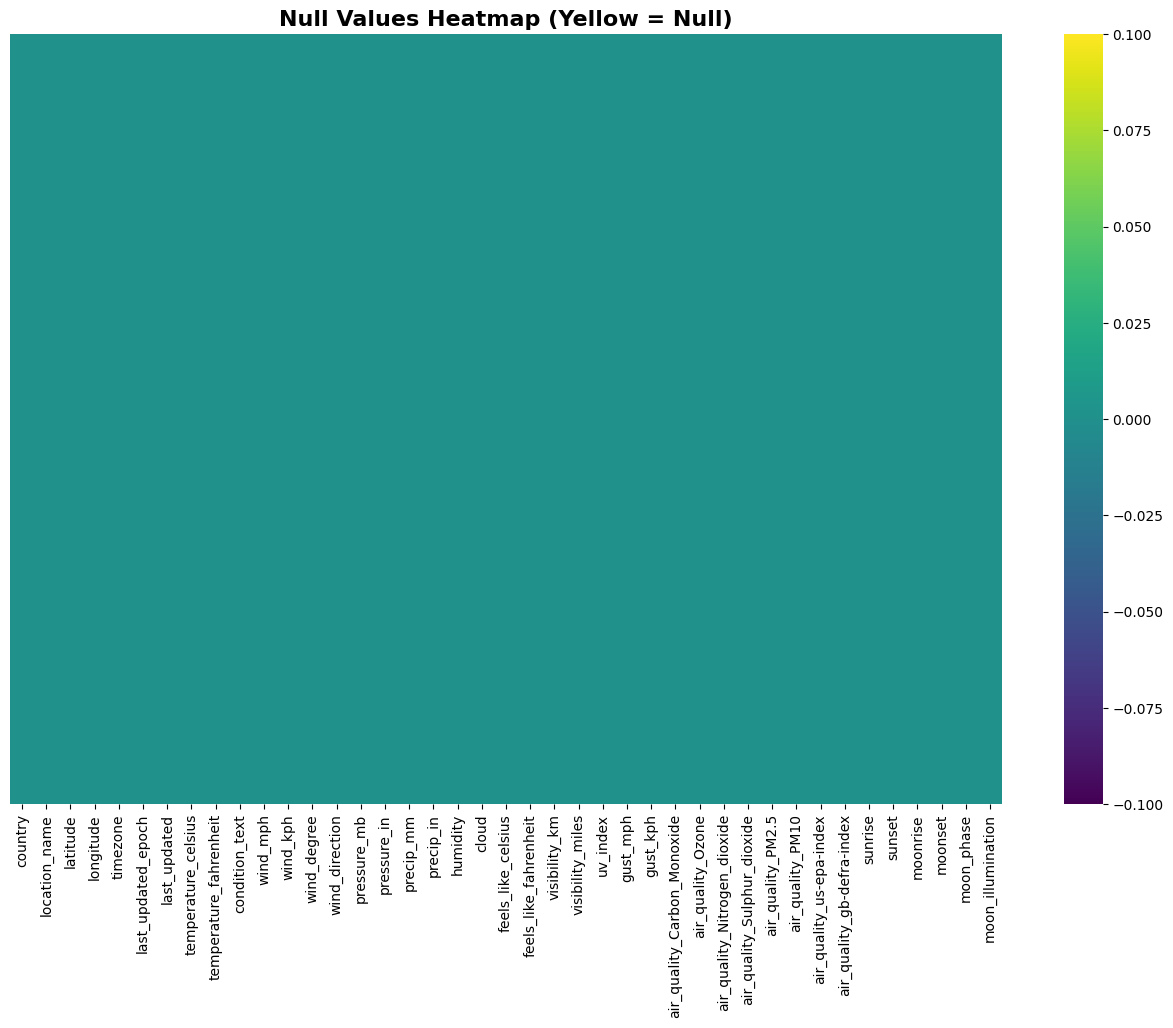

In [9]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=True,
            cmap='viridis')
plt.title('Null Values Heatmap (Yellow = Null)', fontsize=16, fontweight='bold')
plt.show()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
print("Dataset Statistical:")
df.describe()

Dataset Statistical:


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,104648.000000,104648.000000,1.046480e+05,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,...,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000,104648.000000
mean,19.162645,22.064354,1.739143e+09,22.650649,72.772914,8.183439,13.173354,170.839691,1014.014525,29.943183,...,18.413456,503.839991,61.724745,15.644553,11.025821,25.494814,51.959144,1.737826,2.704323,49.939626
std,24.447460,65.807895,1.344230e+07,8.848727,15.927540,7.714024,12.411935,102.677894,11.129026,0.328594,...,14.437018,825.553990,31.869973,25.551782,39.553220,39.835277,159.990471,0.970092,2.529872,35.067595
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.727518e+09,18.000000,64.400000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,10.400000,228.998000,41.000000,1.433000,0.925000,7.250000,10.545000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.739183e+09,24.600000,76.300000,6.900000,11.200000,165.000000,1013.000000,29.930000,...,15.700000,320.050000,59.000000,5.031500,2.405000,14.750000,21.306500,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.750756e+09,28.300000,82.900000,11.200000,18.000000,256.000000,1018.000000,30.050000,...,24.300000,495.800000,78.000000,17.945000,8.880000,29.045000,44.400000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.762330e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


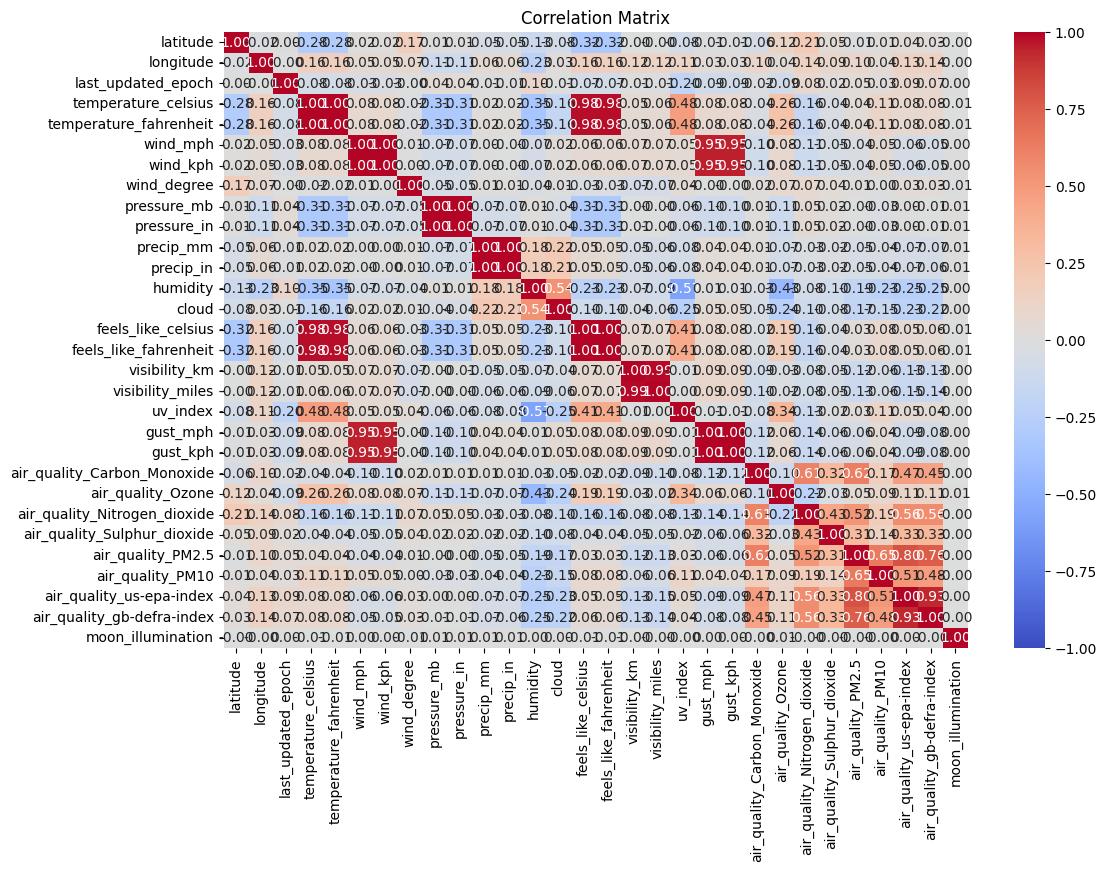

In [12]:
correlation_matrix = correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

### lastupdated datetime component extraction:


In [13]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

print(f"Converted dtype: {df['last_updated'].dtype}")

df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month
df['day'] = df['last_updated'].dt.day
df['hour'] = df['last_updated'].dt.hour
df['minute'] = df['last_updated'].dt.minute

Converted dtype: datetime64[ns]


### trends

In [14]:
yearly_avg = df.groupby('year')['temperature_fahrenheit'].mean()
print("Yearly Temperature Trend:")
for year, temp in yearly_avg.items():
    print(f"  {year}: {temp:.2f}°C")

Yearly Temperature Trend:
  2024: 74.50°C
  2025: 71.49°C


### patterns

In [15]:
monthly_avg = df.groupby('month')['temperature_fahrenheit'].mean()
print("Seasonal Patterns (Monthly):")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month, temp in monthly_avg.items():
    print(f"  {months[month-1]}: {temp:.2f}°C")

hottest_month = monthly_avg.idxmax()
coldest_month = monthly_avg.idxmin()
print(f"  Hottest: {months[hottest_month-1]} ({monthly_avg.max():.2f}°C)")
print(f"   Coldest: {months[coldest_month-1]} ({monthly_avg.min():.2f}°C)")

Seasonal Patterns (Monthly):
  Jan: 63.31°C
  Feb: 63.37°C
  Mar: 68.17°C
  Apr: 71.54°C
  May: 75.13°C
  Jun: 78.27°C
  Jul: 78.84°C
  Aug: 78.35°C
  Sep: 75.65°C
  Oct: 70.89°C
  Nov: 67.13°C
  Dec: 63.95°C
  Hottest: Jul (78.84°C)
   Coldest: Jan (63.31°C)


In [16]:
plt.figure(figsize=(16, 12))


<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

### 1. Monthly Temperature Trends


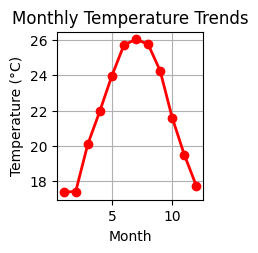

In [17]:
plt.subplot(2, 3, 1)
monthly_temp = df.groupby('month')['temperature_celsius'].mean()
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='red', linewidth=2)
plt.title('Monthly Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

###  2. Air Quality Correlations


Text(0.5, 1.0, 'Weather vs Air Quality Correlations')

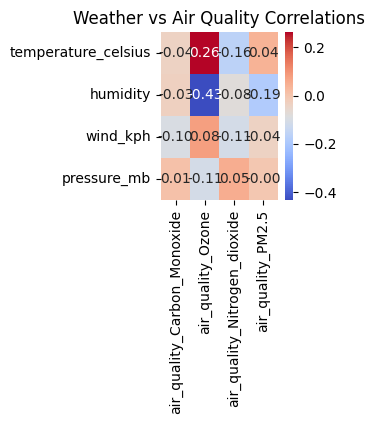

In [18]:
plt.subplot(2, 3, 2)
air_quality_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone',
                   'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5']
weather_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb']
corr_data = df[weather_cols + air_quality_cols].corr()
weather_air_corr = corr_data.loc[weather_cols, air_quality_cols]
sns.heatmap(weather_air_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Weather vs Air Quality Correlations')

###  3. Feature Importance


Text(0.5, 1.0, 'Feature Importance for Temperature')

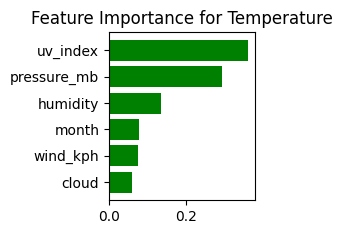

In [19]:
plt.subplot(2, 3, 3)
feature_importance_features = ['humidity', 'wind_kph', 'pressure_mb', 'cloud', 'month', 'uv_index']
X_fi = df[feature_importance_features].dropna()
y_fi = df.loc[X_fi.index, 'temperature_celsius']
model_fi = RandomForestRegressor(n_estimators=100, random_state=42)
model_fi.fit(X_fi, y_fi)
importance = pd.DataFrame({'feature': feature_importance_features,
                          'importance': model_fi.feature_importances_})
importance = importance.sort_values('importance', ascending=True)
plt.barh(importance['feature'], importance['importance'], color='green')
plt.title('Feature Importance for Temperature')

###  4. Spatial Analysis


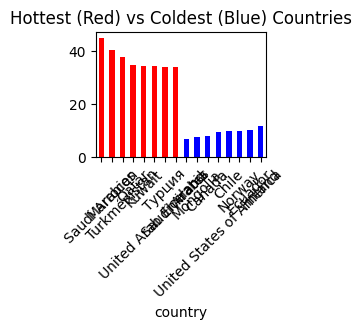

In [20]:
plt.subplot(2, 3, 5)
if 'country' in df.columns:
    country_temp = df.groupby('country')['temperature_celsius'].mean()
    top_countries = country_temp.nlargest(8)
    bottom_countries = country_temp.nsmallest(8)
    combined = pd.concat([top_countries, bottom_countries])
    combined.plot(kind='bar', color=['red']*8 + ['blue']*8)
    plt.title('Hottest (Red) vs Coldest (Blue) Countries')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 5. Geographical Patterns


Text(0.5, 1.0, 'Global Temperature Distribution')

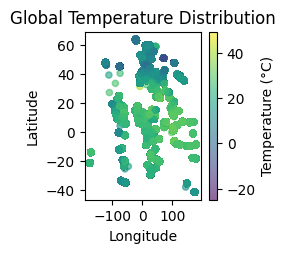

In [21]:
plt.subplot(2, 3, 4)
plt.scatter(df['longitude'], df['latitude'], c=df['temperature_celsius'],
           cmap='viridis', alpha=0.6, s=20)
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Global Temperature Distribution')

###  anomaly detection to identify and analyze outliers.

In [22]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

In [23]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of Outliers in {col}: {len(outliers)}")


Number of Outliers in latitude: 0

Number of Outliers in longitude: 8049

Number of Outliers in last_updated_epoch: 0

Number of Outliers in temperature_celsius: 3270

Number of Outliers in temperature_fahrenheit: 3284

Number of Outliers in wind_mph: 1550

Number of Outliers in wind_kph: 1677

Number of Outliers in wind_degree: 0

Number of Outliers in pressure_mb: 3234

Number of Outliers in pressure_in: 4857

Number of Outliers in precip_mm: 19773

Number of Outliers in precip_in: 16565

Number of Outliers in humidity: 0

Number of Outliers in cloud: 0

Number of Outliers in feels_like_celsius: 2637

Number of Outliers in feels_like_fahrenheit: 2652

Number of Outliers in visibility_km: 20178

Number of Outliers in visibility_miles: 20042

Number of Outliers in uv_index: 39

Number of Outliers in gust_mph: 2716

Number of Outliers in gust_kph: 2759

Number of Outliers in air_quality_Carbon_Monoxide: 9489

Number of Outliers in air_quality_Ozone: 2739

Number of Outliers in air_qual

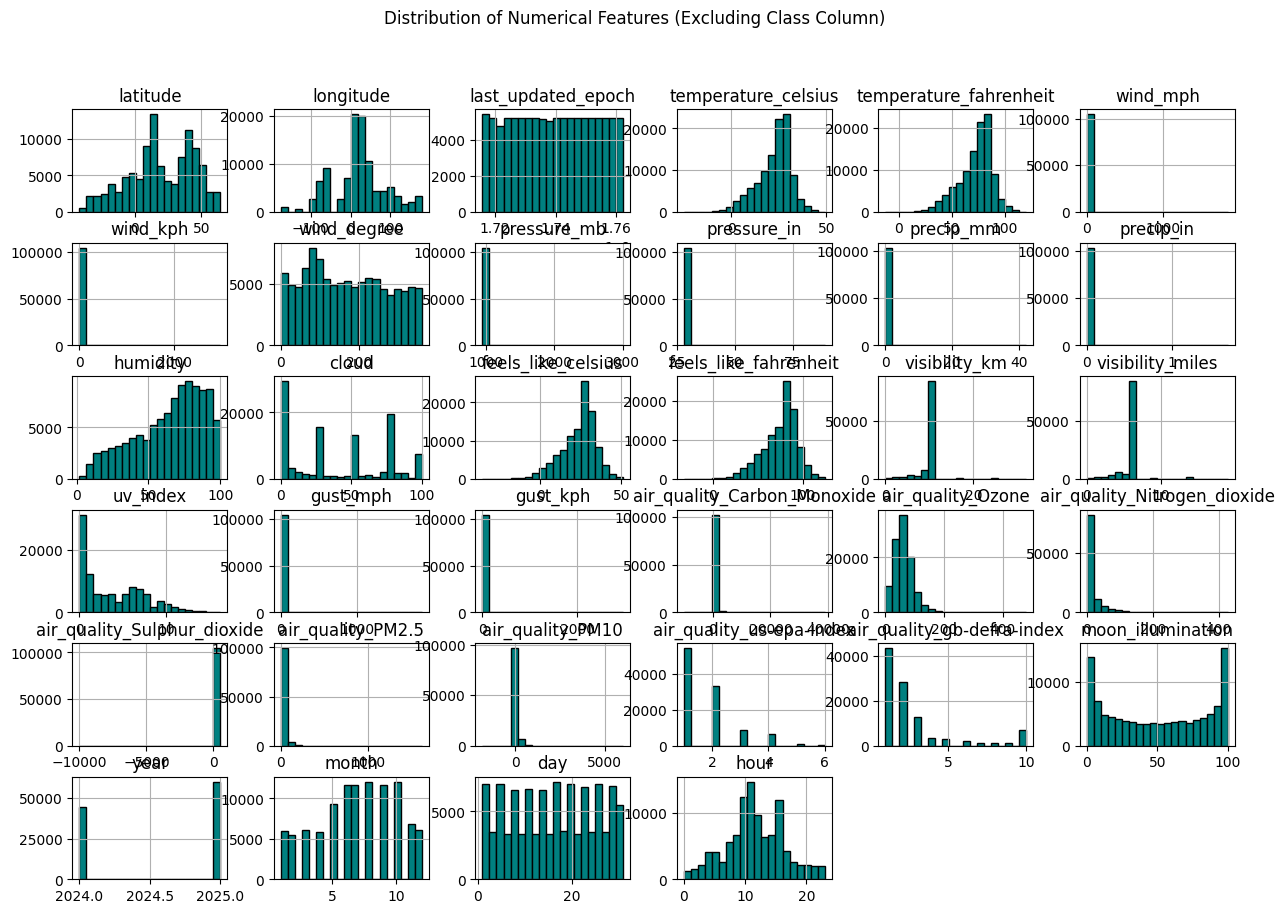

In [24]:
numerical_cols = df.select_dtypes(include=[np.number]).columns[:-1]  # Exclude last column
df[numerical_cols].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle("Distribution of Numerical Features (Excluding Class Column)")
plt.show()

In [25]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in numerical_cols:
    df[col] = zscore(df[col])

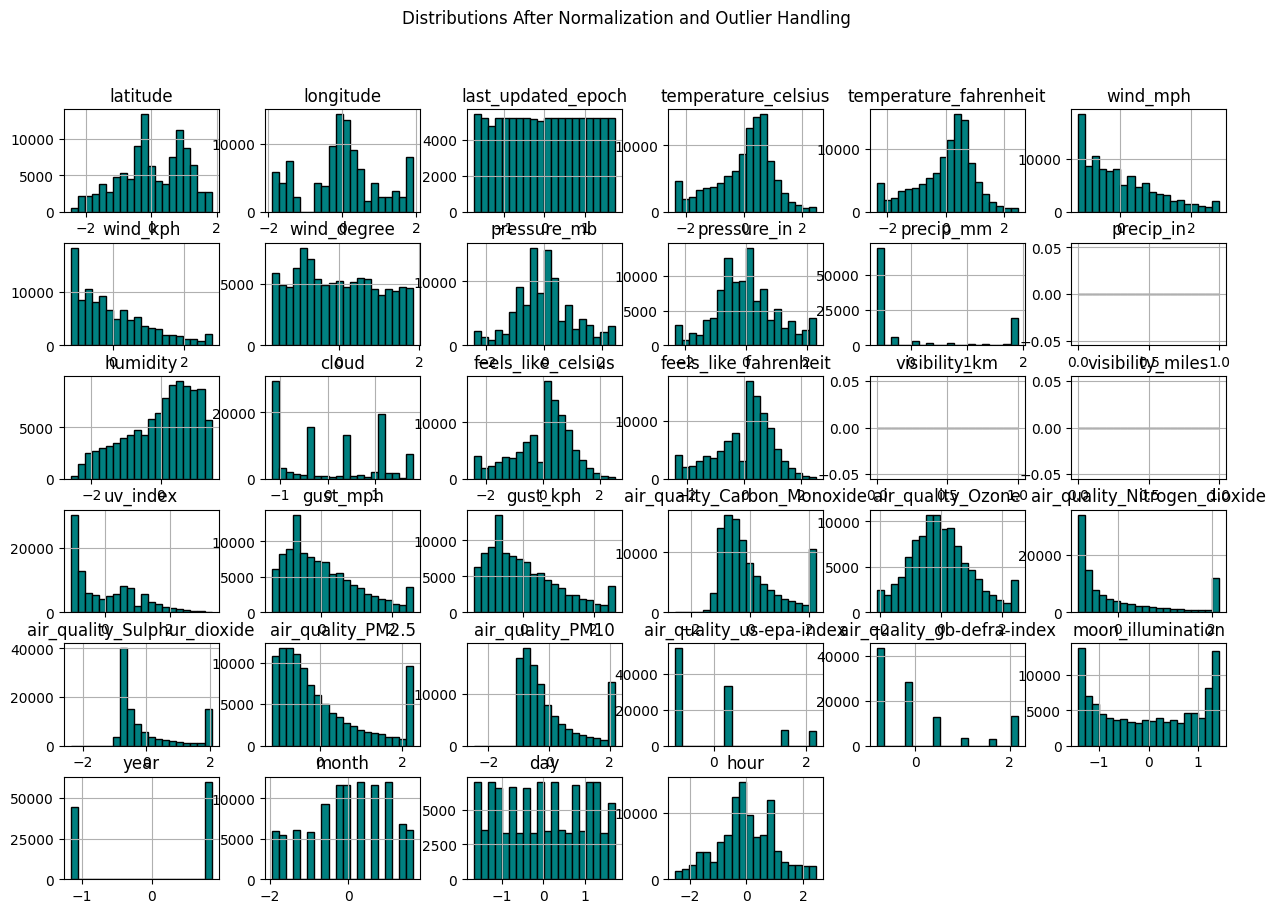

In [26]:
df[numerical_cols].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle("Distributions After Normalization and Outlier Handling")
plt.show()

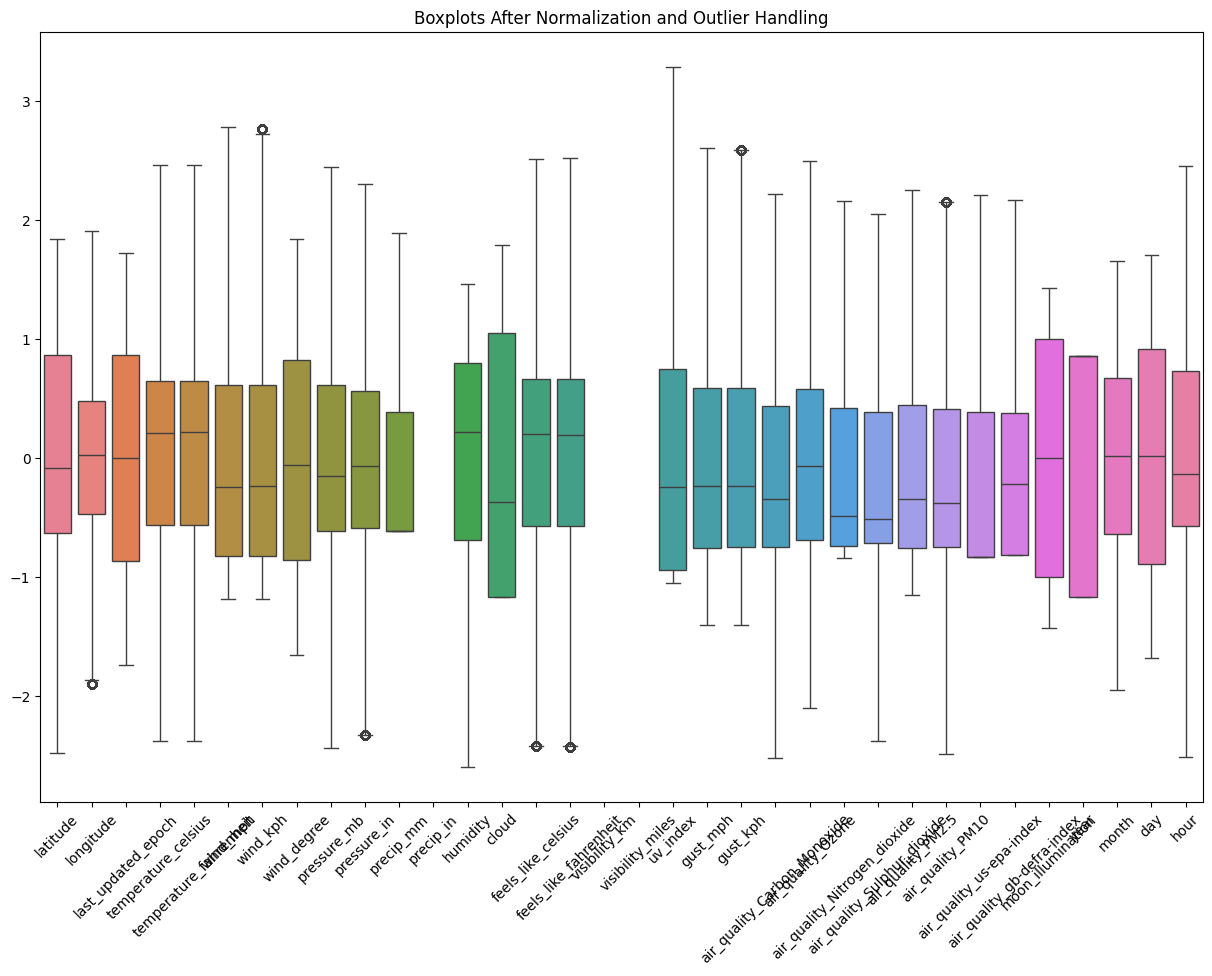

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots After Normalization and Outlier Handling")
plt.xticks(rotation=45)
plt.show()

In [38]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [39]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['hour'] = df['last_updated'].dt.hour
df['dayofweek'] = df['last_updated'].dt.dayofweek
df['month'] = df['last_updated'].dt.month
df['dayofyear'] = df['last_updated'].dt.dayofyear

# Create lag features
df['temp_lag_1'] = df['temperature_celsius'].shift(1)
df['temp_lag_24'] = df['temperature_celsius'].shift(24)

In [43]:
features = ['hour', 'dayofweek', 'month', 'temp_lag_1', 'temp_lag_24',
           'humidity', 'wind_kph', 'pressure_mb', 'cloud']

X = df[features].dropna()
y = df['temperature_celsius']
y=y.loc[X.index]


In [32]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}


In [44]:
results = {}
for name, model in models.items():
    model.fit(X, y)
    predictions = model.predict(X)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mape = np.mean(np.abs((y - predictions) / y))
    accuracy = (1 - mape) * 100

    # Store as simple values
    results[name] = [round(accuracy, 2), round(rmse, 2)]

# Create DataFrame with proper columns
results_df = pd.DataFrame(results, index=['Accuracy (%)', 'Loss (RMSE)']).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                   Accuracy (%)  Loss (RMSE)
Linear Regression        -70.96         0.78
Random Forest             62.10         0.17
XGBoost                  -10.59         0.44
